In [1]:
import obspy
import obspy.taup
from obspy.taup.tau_model import TauModel
from obspy.taup.taup_create import build_taup_model
from obspy.taup import TauPyModel
from obspy.taup.taup_time import TauPTime
from obspy.taup import plot_travel_times
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib notebook

In [40]:
vel = pd.read_csv('Gudkova.csv')
print(vel)

       Depth  Pvelz  Svelz  Unnamed: 3
0      0.000  0.265  0.150       1.665
1      0.010  0.330  0.190       1.690
2      0.020  0.420  0.270       1.710
3      0.030  0.500  0.300       1.730
4      0.080  0.600  0.350       1.750
..       ...    ...    ...         ...
77  2858.102  4.540  0.000       6.437
78  3039.064  4.554  0.000       6.448
79  3220.025  4.562  0.000       6.453
80  3389.500  4.563  0.000       6.454
81  3389.500  4.563  4.563       6.454

[82 rows x 4 columns]


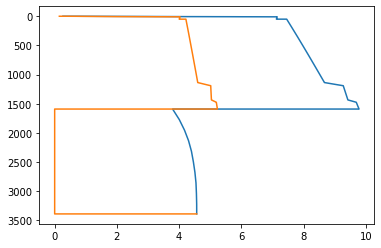

In [50]:
plt.gca().invert_yaxis()
plt.plot(vel['Pvelz'], vel['Depth'])
plt.plot(vel['Svelz'], vel['Depth'])

In [3]:
DWAK = pd.read_csv('DWAK.csv')
DWThot = pd.read_csv('DWThot.csv')
hotCrust = pd.read_csv('DWThotCrust1.csv')
hotCrust1b = pd.read_csv('DWThotCrust1b.csv')
EH45T = pd.read_csv('EH45Tcold.csv')
coldCrust = pd.read_csv('EH45TcoldCrust1.csv')
coldCrust1b = pd.read_csv('EH45TcoldCrust1b.csv')
hotCrust2 = pd.read_csv('EH45ThotCrust2.csv')
hotCrust2b = pd.read_csv('EH45ThotCrust2b.csv')
Gud = pd.read_csv('Gudkova.csv')
LFAK = pd.read_csv('LFAK.csv')
MAAK = pd.read_csv('MAAK.csv')
SANAK = pd.read_csv('SANAK.csv')
TAYAK = pd.read_csv('TAYAK.csv')

In [4]:
mod_ls = [DWAK, DWThot, hotCrust, hotCrust1b, EH45T, coldCrust, coldCrust1b, hotCrust2, 
          hotCrust2b, Gud, LFAK, MAAK, SANAK, TAYAK]
for mod in mod_ls:
    mod.columns = ['Depth', 'Pvelz', 'Svelz', '?']

<IPython.core.display.Javascript object>


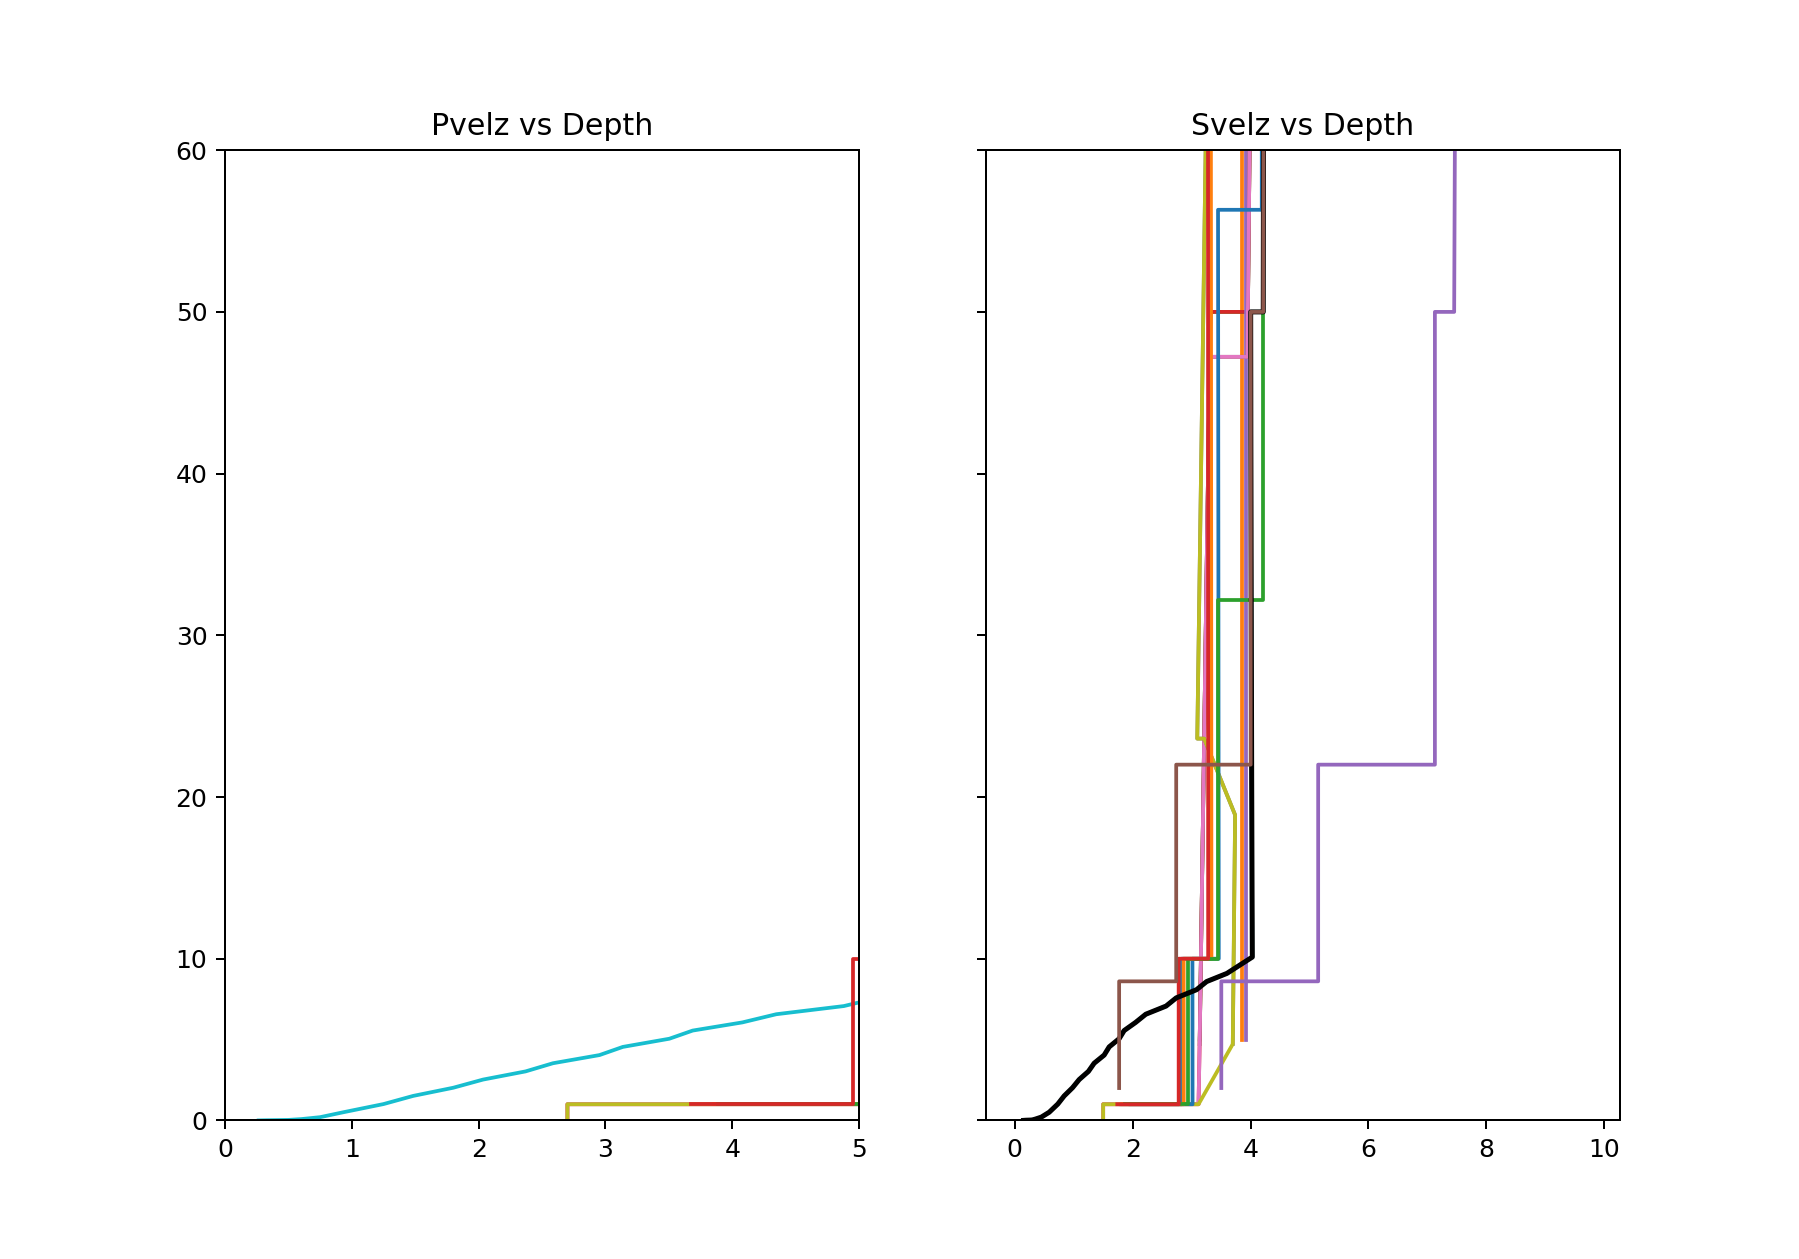

In [9]:
%matplotlib notebook
fig, ax = plt.subplots(1,2,figsize=(10,7), sharey=True)
ax[0].invert_yaxis()

for mod in mod_ls:
    ax[0].plot(mod['Pvelz'], mod['Depth'])
    ax[1].plot(mod['Svelz'], mod['Depth'])
    
ax[0].set_title('Pvelz vs Depth')
ax[1].set_title('Svelz vs Depth')
ax[0].set_ylim(0,60)
ax[0].set_xlim(0,5)
ax[1].plot(mod_ls[9]['Svelz'], mod_ls[9]['Depth'], color='k', lw=2)

In [62]:
all_dist = [Gud, MAAK, TAYAK]
most_dist = [DWAK, EH45T, coldCrust1b, LFAK, coldCrust]
none_dist = [DWThot, hotCrust, hotCrust1b, coldCrust1b, hotCrust2, 
          hotCrust2b, SANAK]

<IPython.core.display.Javascript object>


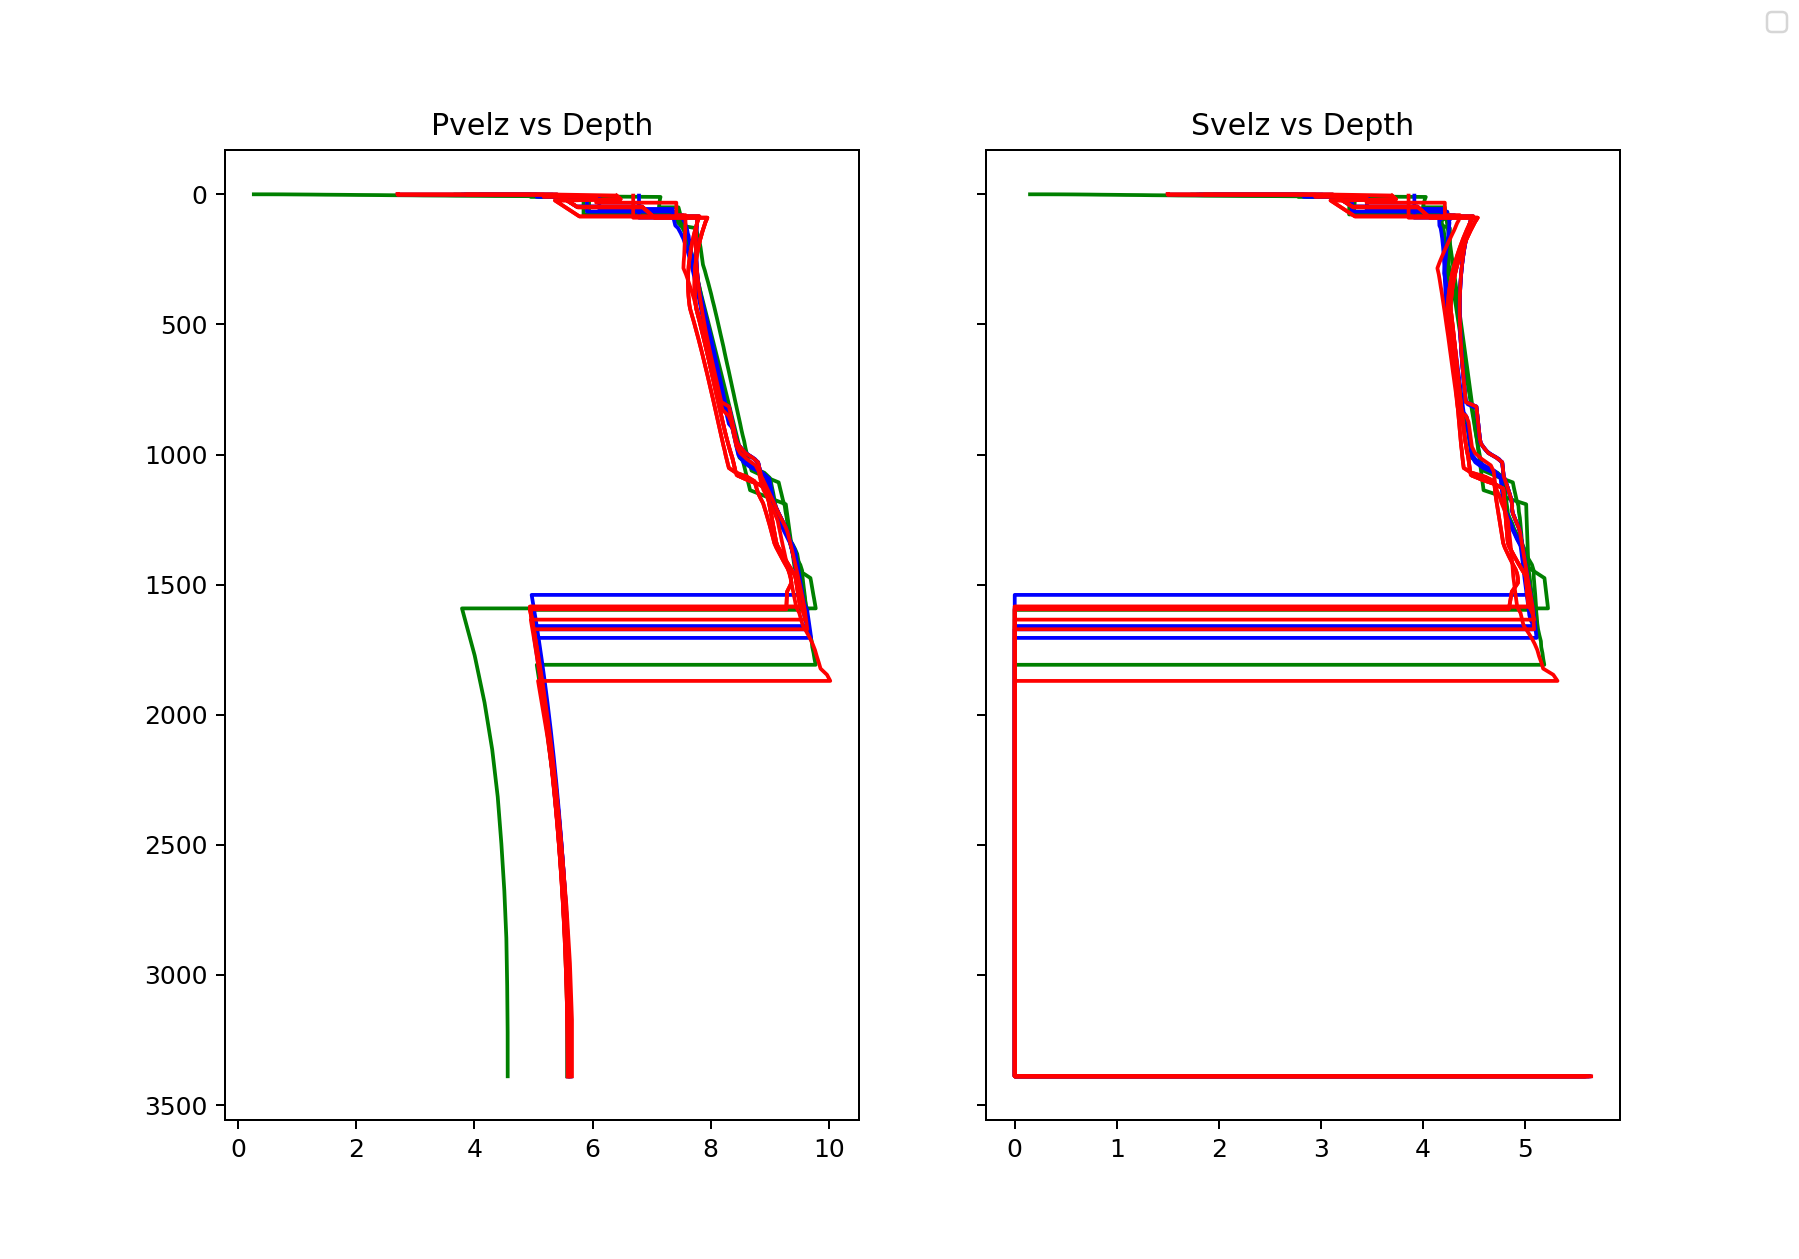

No handles with labels found to put in legend.


In [74]:
%matplotlib notebook
fig, ax = plt.subplots(1,2,figsize=(10,7), sharey=True)
ax[0].invert_yaxis()

for mod in all_dist:
    ax[0].plot(mod['Pvelz'], mod['Depth'], 'g')
    ax[1].plot(mod['Svelz'], mod['Depth'], 'g')
for mod in most_dist:
    ax[0].plot(mod['Pvelz'], mod['Depth'], 'b')
    ax[1].plot(mod['Svelz'], mod['Depth'], 'b')
for mod in none_dist:
    ax[0].plot(mod['Pvelz'], mod['Depth'], 'r')
    ax[1].plot(mod['Svelz'], mod['Depth'], 'r')
    
ax[0].set_title('Pvelz vs Depth')
ax[1].set_title('Svelz vs Depth')

<IPython.core.display.Javascript object>


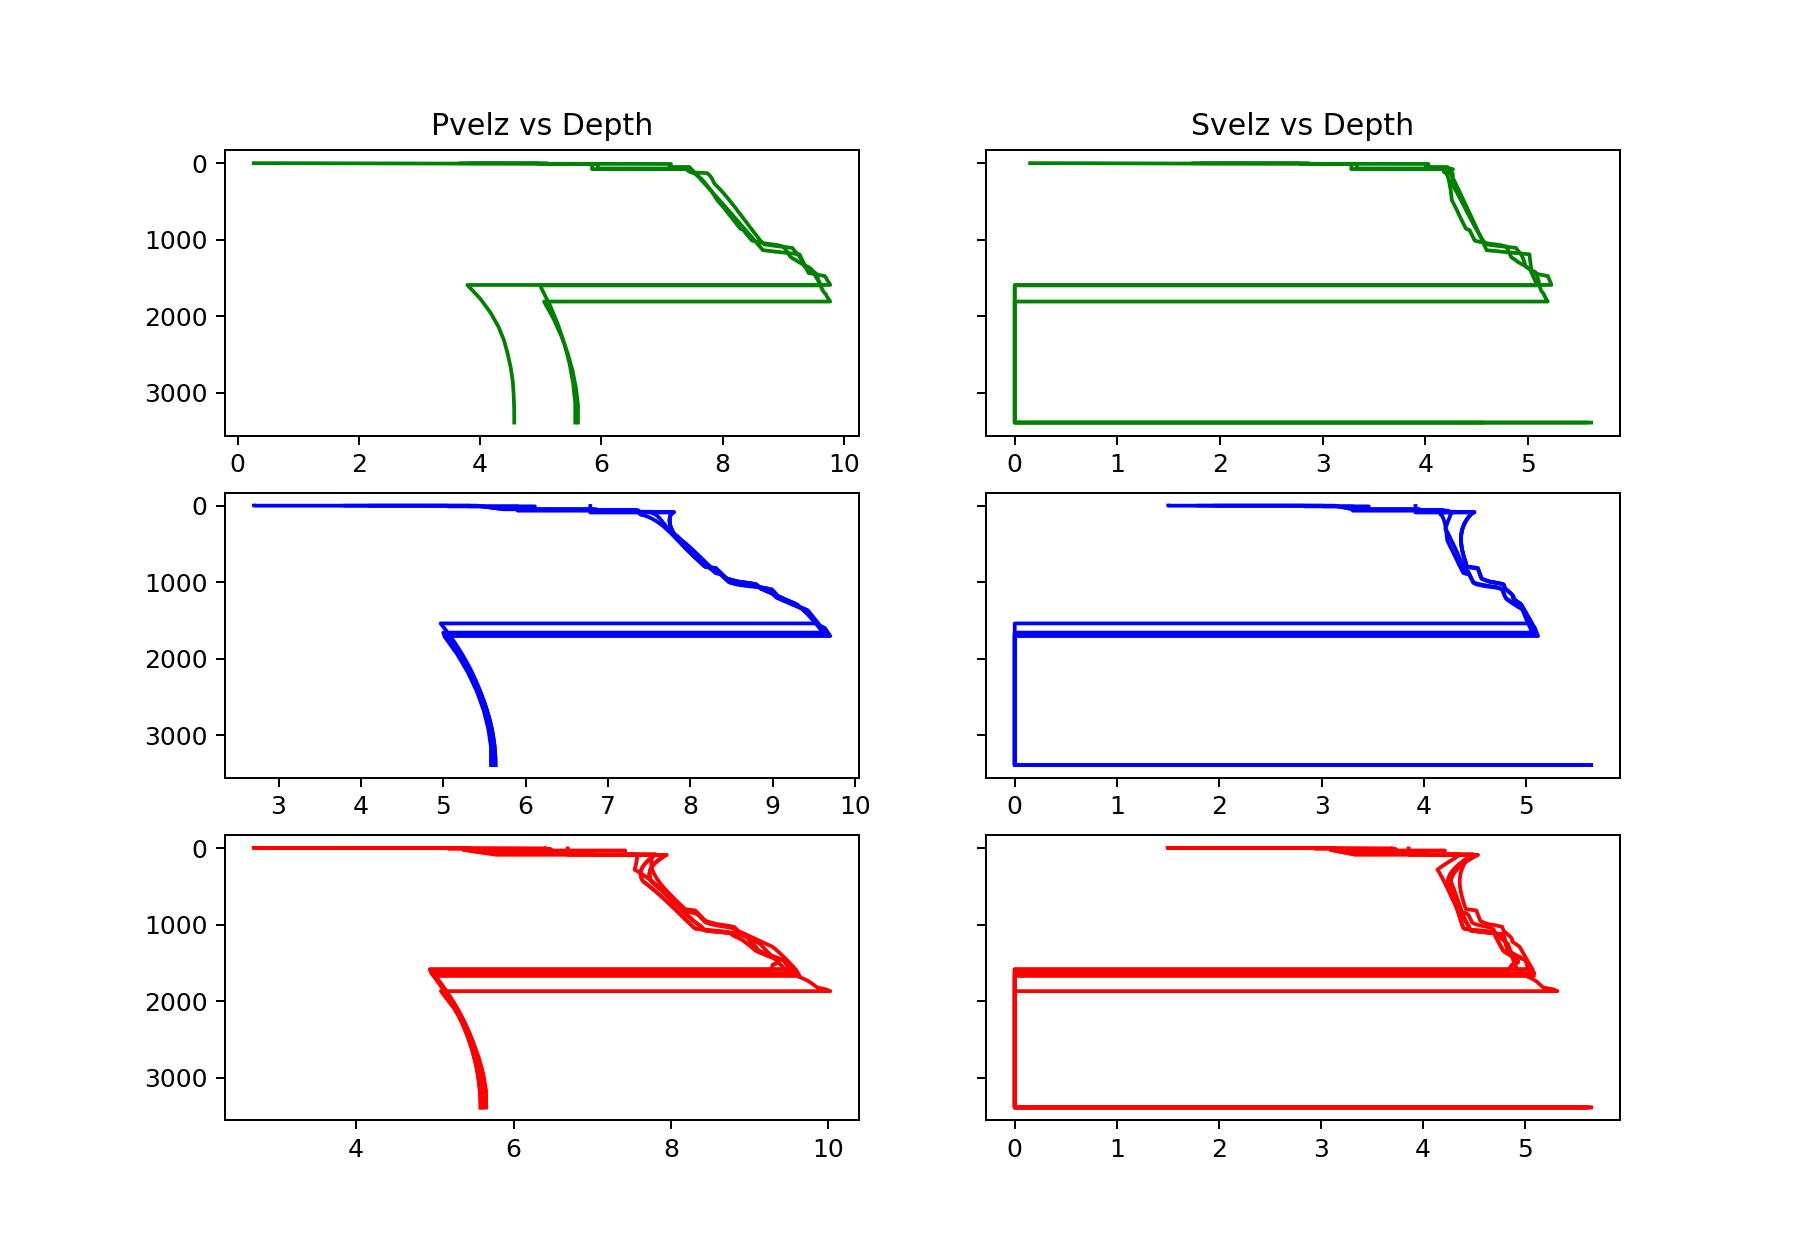

Text(0.5, 1.0, 'Svelz vs Depth')

In [81]:
%matplotlib notebook
fig, ax = plt.subplots(3,2,figsize=(10,7), sharey=True)
ax[0][0].invert_yaxis()

for mod in all_dist:
    ax[0][0].plot(mod['Pvelz'], mod['Depth'], 'g')
    ax[0][1].plot(mod['Svelz'], mod['Depth'], 'g')
for mod in most_dist:
    ax[1][0].plot(mod['Pvelz'], mod['Depth'], 'b')
    ax[1][1].plot(mod['Svelz'], mod['Depth'], 'b')
for mod in none_dist:
    ax[2][0].plot(mod['Pvelz'], mod['Depth'], 'r')
    ax[2][1].plot(mod['Svelz'], mod['Depth'], 'r')
    
ax[0][0].set_title('Pvelz vs Depth')
ax[0][1].set_title('Svelz vs Depth')

In [24]:
combo = pd.read_csv('Combined.csv')
combo.columns = ['Depth', 'Pvelz', 'Svelz', 'Density']

<IPython.core.display.Javascript object>


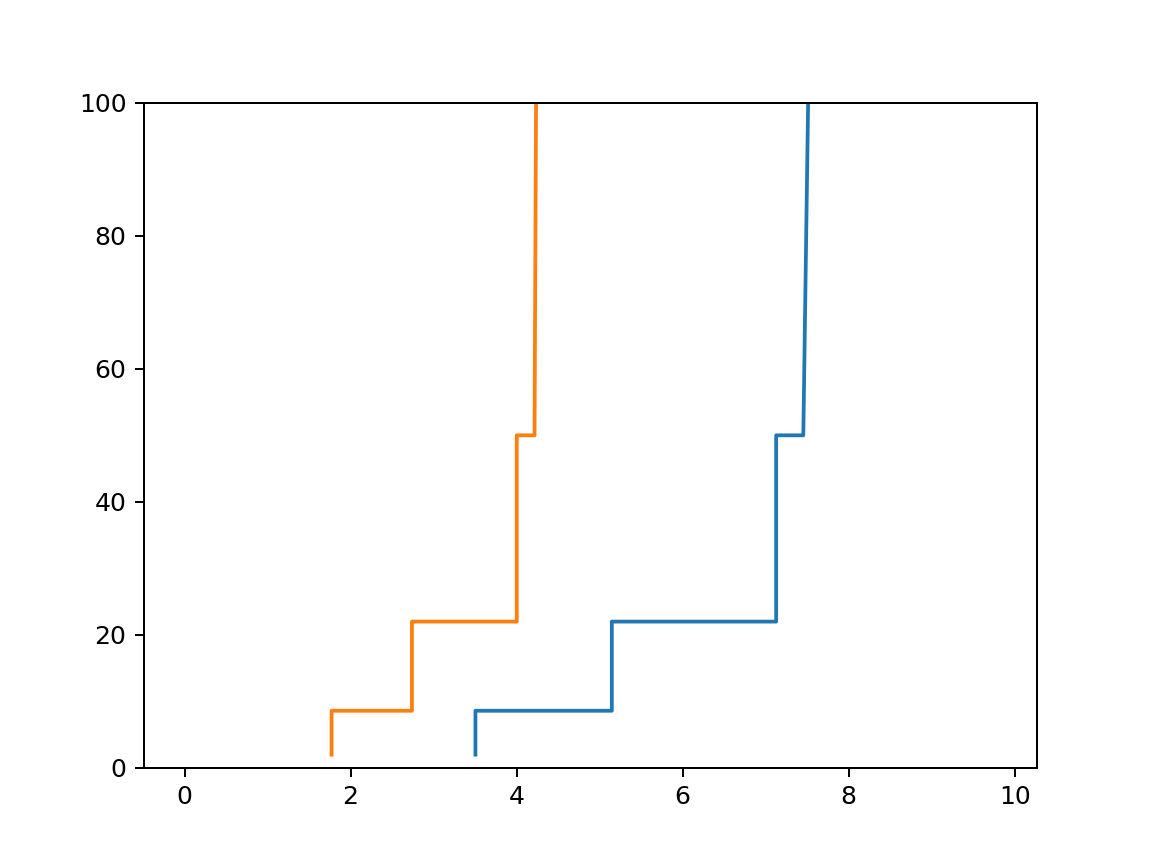

(0, 100)

In [27]:
%matplotlib notebook
plt.gca().invert_yaxis()
plt.plot(combo['Pvelz'], combo['Depth'])
plt.plot(combo['Svelz'], combo['Depth'])
plt.ylim(0,100)

In [2]:
IPython_default = plt.rcParams.copy()

from matplotlib import cycler

plt.rcParams['font.sans-serif'] = 'Helvetica Neue'

# colors = cycler('color',
#                 ['#EE6666', '#3388BB', '#9988DD',
#                  '#EECC55', '#88BB44', '#FFBBBB'])

colors = cycler('color',
                ['#88BB44','#EECC55','#9988DD','#3388BB','#EE6666',])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

<IPython.core.display.Javascript object>


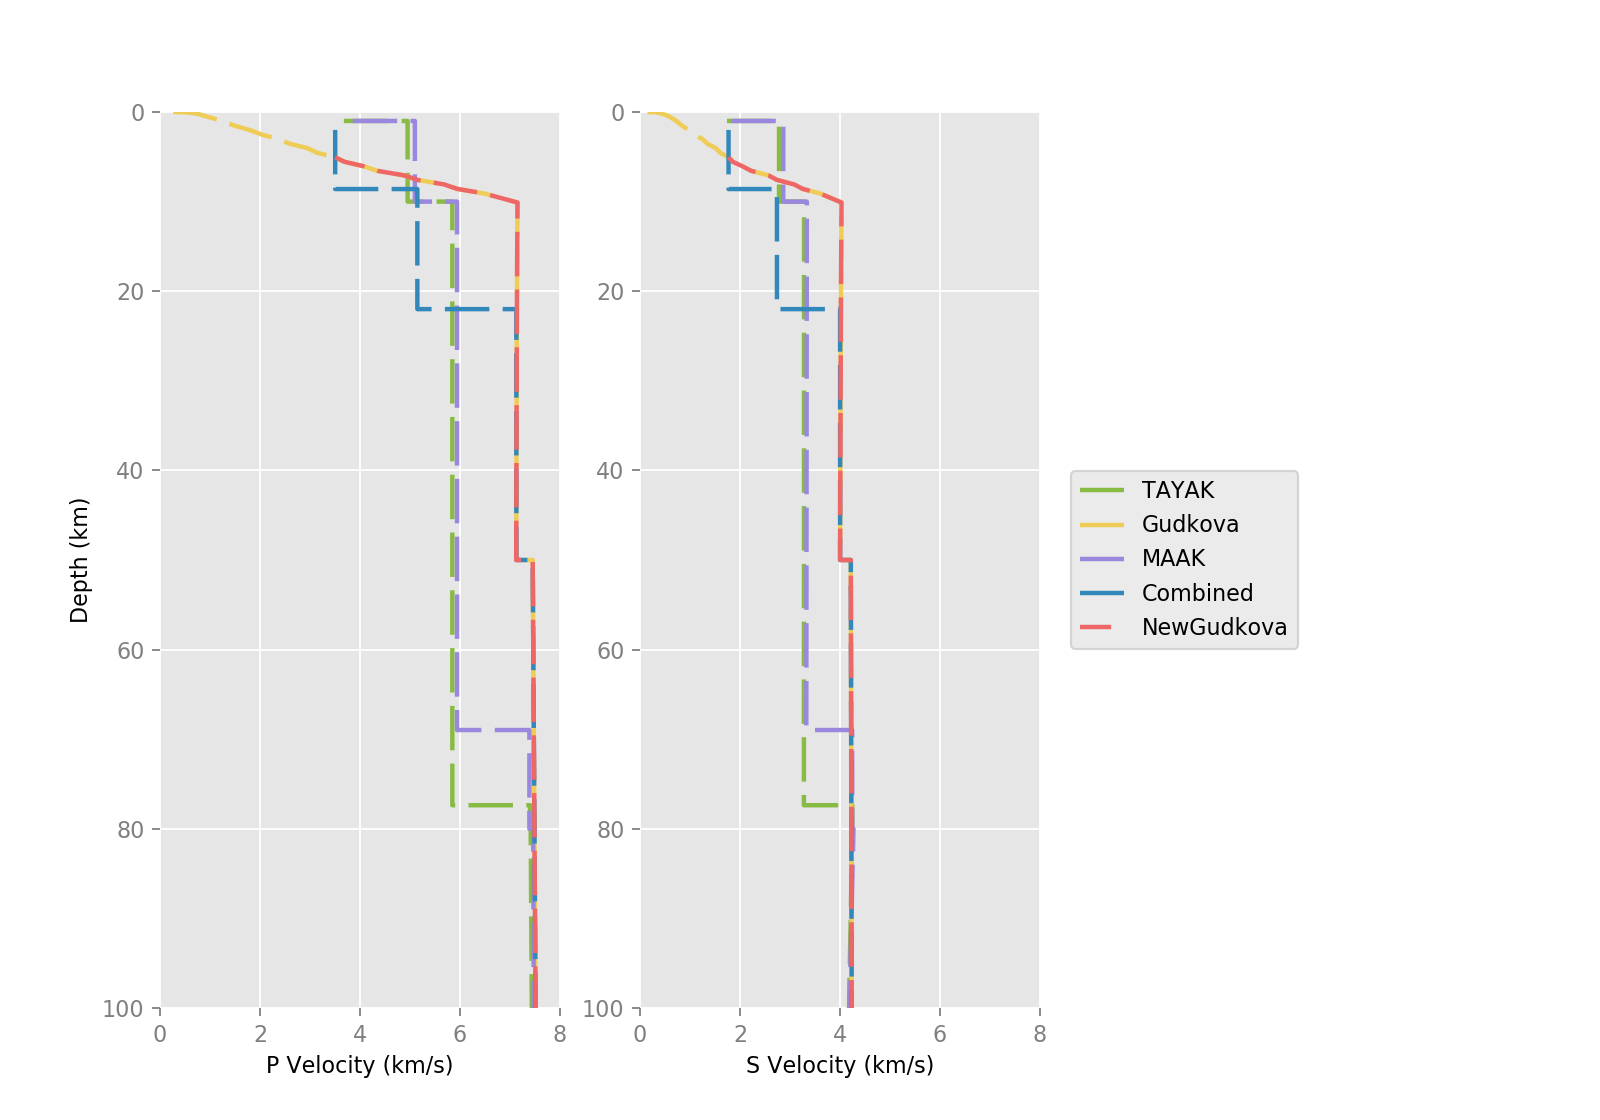

In [26]:
# model_ls = ['Combined', 'DWAK', 'DWThot', 'DWThotCrust1', 'DWThotCrust1b', 'EH45Tcold', 'EH45TcoldCrust1', 'EH45TcoldCrust1b', 
#            'EH45ThotCrust2', 'EH45ThotCrust2b', 'Gudkova', 'LFAK', 'MAAK', 'NewGudkova', 'SANAK', 'TAYAK']

# short_ls = ['Combined', 'Gudkova', 'MAAK', 'NewGudkova', 'TAYAK']
short_ls = ['TAYAK', 'Gudkova', 'MAAK', 'NewGudkova', 'Combined']

fig = plt.figure(figsize=(10,7))
ax[0] = fig.add_axes([0.1, 0.1, 0.25, 0.8]); ax[1] = fig.add_axes([0.4, 0.1, 0.25, 0.8])
# ax[0].invert_yaxis()
ax[0].set_ylabel('Depth (km)')
ax[0].set_ylim(100,0); ax[1].set_ylim(100,0)
ax[0].set_xlim(0,8); ax[1].set_xlim(0,8)
ax[0].set_xlabel('P Velocity (km/s)'); ax[1].set_xlabel('S Velocity (km/s)')
ax[0].grid(True); ax[1].grid(True)

for model in short_ls:
    vel = pd.read_csv(str(model) + '.csv')
    vel.columns = ['Depth', 'Pvelz', 'Svelz', 'Density']
    
    ax[0].plot(vel['Pvelz'], vel['Depth'], linestyle=(0, (10, 3)), label = model)
    ax[1].plot(vel['Svelz'], vel['Depth'], linestyle=(0, (10, 3)), label = model)
    
ax[1].legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

In [120]:
plt.savefig('/Users/maddysita/Desktop/CIERA_REU/script_notebooks/paper_figures/shortmodplot.png')

In [14]:
plt.savefig('/Users/maddysita/Desktop/CIERA_REU/script_notebooks/paper_figures/paper_pdfs/shortmodplot.pdf')